In [1]:
%cd '../'

/home/rylov/PycharmProjects/multiclass-multiband-classification/src/exp_main


In [3]:
import numpy as np
import matplotlib.pyplot as plt

from torch.utils.data import DataLoader

from data_frame import make_data_frame
from generator import MyDataset
from settings import CSV_FOLDER_PATH, S2_DATA_FOLDER_PATH

In [4]:
dataset, df = make_data_frame(CSV_FOLDER_PATH, 'train.csv', 'val.csv', 'test.csv')
train_df = df.get('train')

In [5]:
batch_size = 10

train_dataset = MyDataset(train_df, s2_input_size=(13, 32, 32), is_train=False)
train_loader = DataLoader(train_dataset,
                         batch_size=batch_size,
                         pin_memory=True,
                         shuffle=True)

idx, x, y = next(iter(train_loader))

RuntimeError: cuda runtime error (2) : out of memory at ../aten/src/THC/THCCachingHostAllocator.cpp:280

In [15]:
idx

tensor([2970, 5726, 5771,  657, 1586, 7381, 3400, 5070, 1923, 3239])

In [16]:
y

tensor([3, 7, 7, 0, 2, 9, 4, 6, 2, 4])

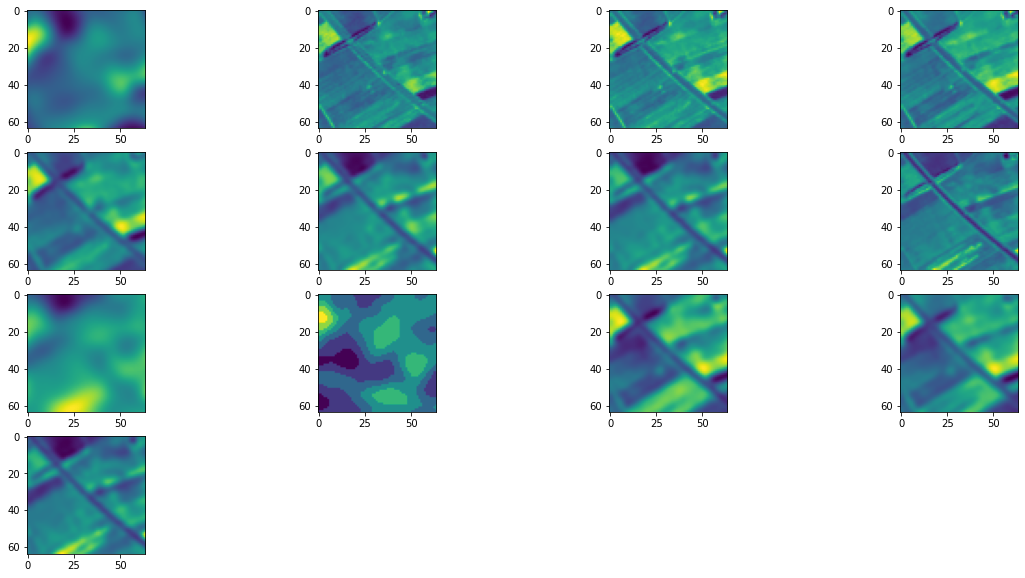

In [13]:
x = x[0].numpy()
x = np.swapaxes(x, 0, 2)
fig = plt.figure(figsize = (20, 10))
for i in range(13):
    fig.add_subplot(4, 4, i+1)
    plt.imshow(x[:,:,i])